In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
prices = np.loadtxt('prices.txt')

In [3]:
prices

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [43.66,  4.14, 28.59, ...,  9.82, 33.86, 38.07],
       [43.61,  4.14, 28.64, ...,  9.81, 34.06, 39.07],
       [43.52,  4.12, 28.68, ...,  9.79, 34.17, 38.84]])

In [6]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

In [46]:
pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

Loaded 100 instruments for 250 days


In [9]:
prcAll = prcAll.T

In [10]:
prcAll

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [43.66,  4.14, 28.59, ...,  9.82, 33.86, 38.07],
       [43.61,  4.14, 28.64, ...,  9.81, 34.06, 39.07],
       [43.52,  4.12, 28.68, ...,  9.79, 34.17, 38.84]])

In [23]:
from sklearn.preprocessing import normalize

In [32]:
matrix = np.array(prcAll)
matrix

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [43.66,  4.14, 28.59, ...,  9.82, 33.86, 38.07],
       [43.61,  4.14, 28.64, ...,  9.81, 34.06, 39.07],
       [43.52,  4.12, 28.68, ...,  9.79, 34.17, 38.84]])

<AxesSubplot:>

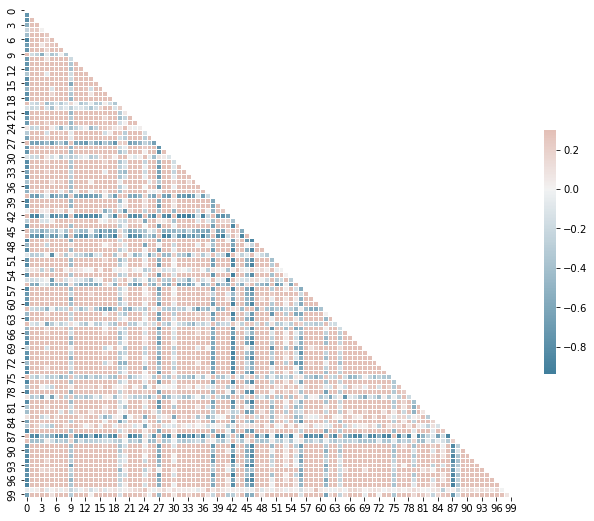

In [54]:
df = pd.DataFrame(prcAll)
df[[1,2]]
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

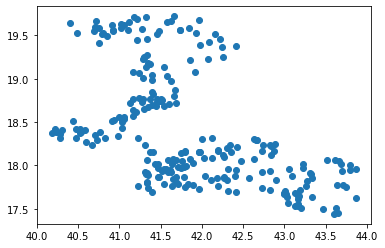

In [73]:
plt.scatter(prcAll.T[0], prcAll.T[3])

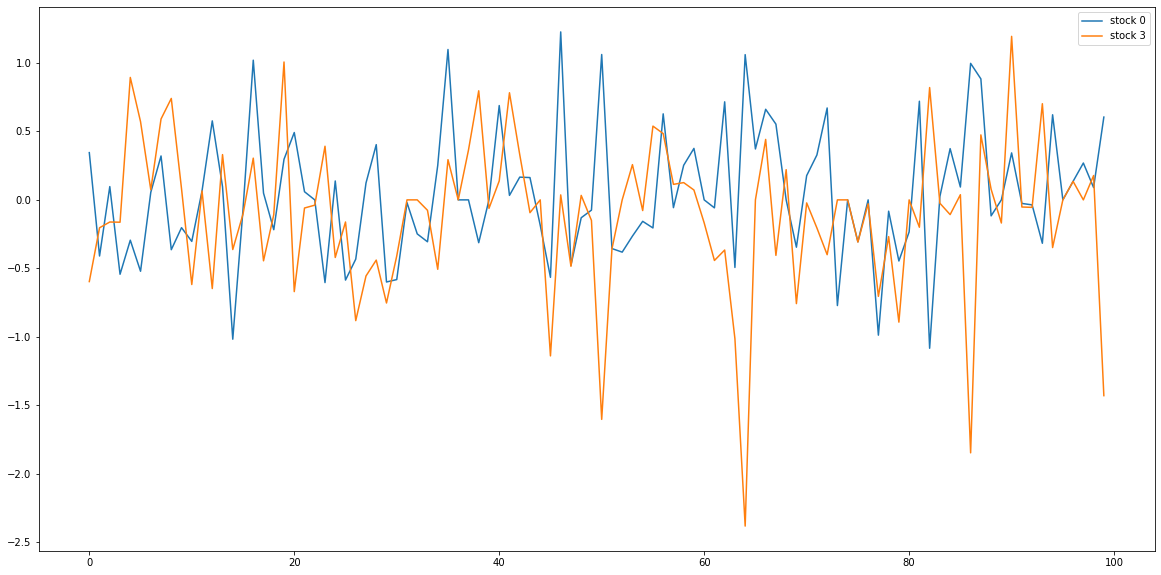

In [76]:
plt.figure(figsize=(20, 10))
stockIndex = 3
plt.plot(percentageChanges[0], label = 'stock 0')
plt.plot(percentageChanges[stockIndex], label = f"stock {stockIndex}")
plt.legend()

In [68]:
corr[corr < -0.6].count()

0     58
1      6
2      6
3      2
4      0
      ..
95     7
96     5
97     4
98     0
99     3
Length: 100, dtype: int64

In [63]:
prcAll

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [43.66,  4.14, 28.59, ...,  9.82, 33.86, 38.07],
       [43.61,  4.14, 28.64, ...,  9.81, 34.06, 39.07],
       [43.52,  4.12, 28.68, ...,  9.79, 34.17, 38.84]])

In [59]:
[stats.pearsonr(prcAll[87], x) for x in prcAll]

[(0.9957053628227623, 4.2186456345875e-103),
 (0.9958762444036796, 5.792653691122011e-104),
 (0.9957104140822968, 3.982726066528096e-103),
 (0.9956843405015943, 5.356385226861972e-103),
 (0.9956953345784981, 4.728284468805763e-103),
 (0.9955842956482119, 1.642614773347084e-102),
 (0.9956320310869902, 9.65433453662019e-103),
 (0.9955492549725451, 2.417578973644973e-102),
 (0.9956305199822209, 9.819007600108348e-103),
 (0.9956646262617945, 6.693590963270471e-103),
 (0.9955369084365572, 2.768249797185625e-102),
 (0.9952990392119607, 3.505588479579592e-101),
 (0.9953914827283576, 1.3275848120644766e-101),
 (0.9953888526400786, 1.3651383330642615e-101),
 (0.9951884005638475, 1.0931184138797586e-100),
 (0.9947035897059455, 1.1929400638440599e-98),
 (0.9947044457621539, 1.1835526097359212e-98),
 (0.9952669648959761, 4.888035045929201e-101),
 (0.9949028573776003, 1.8305105384556856e-99),
 (0.9946790592689245, 1.4952046406192346e-98),
 (0.9947279651832266, 9.521470611218006e-99),
 (0.9948516374

In [41]:
percentageChanges = np.diff(prcAll, axis = 0) / prcAll[1:, :] * 100

<AxesSubplot:>

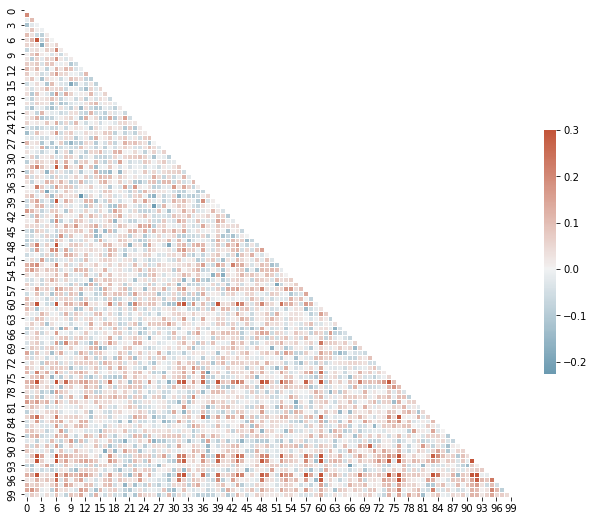

In [50]:
df = pd.DataFrame(percentageChanges)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

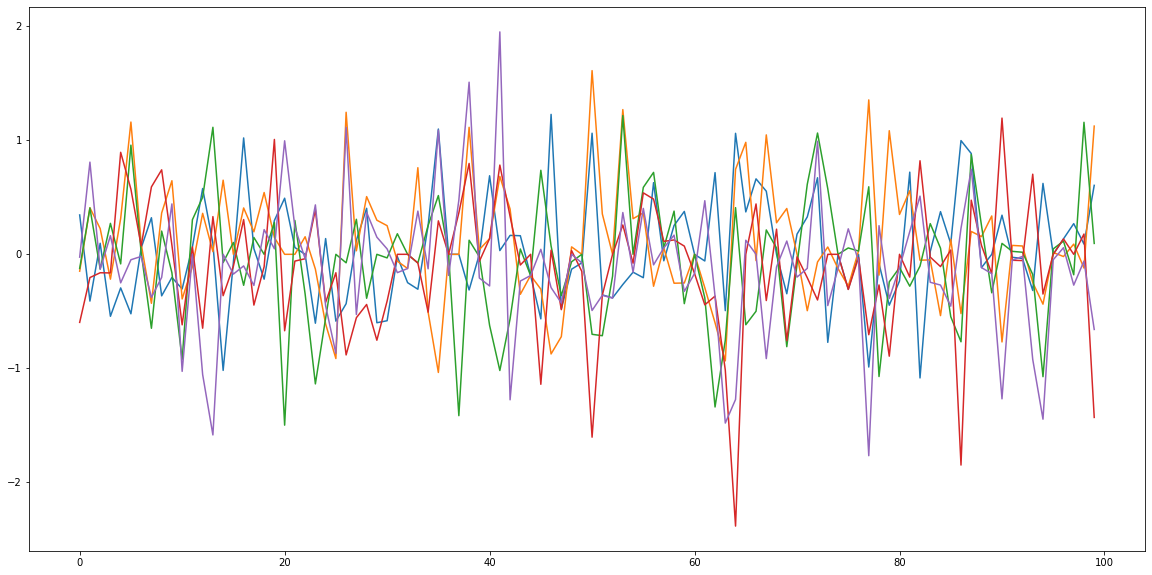

In [44]:
plt.figure(figsize = (20, 10))
for percentages in percentageChanges[:5]:
    plt.plot(percentages)

In [20]:
stock1 = prcAll[0]

In [22]:
stock1

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'